In [1]:
import os
os.chdir("..")

# Advanced Voest Dataset Methods

Here we do feature engineering, strategy development and ensemble methods for the voest dataset.

In [2]:
from utils.data_module import VoestDataModule
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

{'a/b/c': 1, 'a/b/d': 2, 'a/e': 3, 'f': 4}


In [3]:
df = pd.read_csv(filepath_or_buffer=os.path.join("datasets/voest_datasets", "voest_realistic_clean.csv"))

In [4]:
df

,BALANCING_TIME_UNIT_UTC,PROGNOSE-EXT_Preise_EURspez_AE00-ENTSOE-Indikative,PROGNOSE-EXT_AT.in.Tertiärregelenergie_st_e,PROGNOSE-EXT_AT.in.Tertiärregelenergie_st_v,PROGNOSE-EXT_AT.in.TertiärregelenergieAngebot_st_e,PROGNOSE-EXT_AT.in.TertiärregelenergieAngebot_st_v,PROGNOSE-EXT_SCR.pos.Price.in.AT_-_-,PROGNOSE-EXT_SCR.neg.Price.in.AT_-_-,PROGNOSE-EXT_AT.in.Sekundärregelenergie_st_e,PROGNOSE-EXT_AT.in.Sekundärregelenergie_st_v,...,ISTWERT-EXT_AT.in.Andere_st_e,ISTWERT-EXT_AT.in.DE.out.CrossBorderBalancing.LeistungAggregated_st_e,ISTWERT-EXT_DE.in.AT.out.CrossBorderBalancing.LeistungAggregated_st_e,PROGNOSE-EXT_Preise_EURspez_EPEXSpot-AT-Viertelstundenprodukt,PROGNOSE-EXT_Preise_EURspez_EPEXSpot-AT-Stundenprodukt,ISTWERT-SQL_DT07_st_e-Grenzkosten-EG,ISTWERT-VARB_Preise_eg_CEGHIX-VWAP,ISTWERT-SQL_Preise_Kohle_v,ISTWERT-VARB_Preise_-_DollarInEuro,PROGNOSE-EXT_AT.out_in.AusgleichsenergieMenge_st_v
0,2022-11-01 00:00:00,215.22,0.0,0.0,282.0,199.0,332.0,0.0,11.0,0.0,...,22.0,0.0,32.0,-24.99,112.01,170.38077,44.948,79.956410,0.9914,-33.00
1,2022-11-01 00:15:00,189.47,0.0,0.0,282.0,199.0,332.0,0.0,11.0,0.0,...,22.0,0.0,32.0,142.29,112.01,170.38077,44.948,79.956410,0.9914,-29.00
2,2022-11-01 00:30:00,170.06,0.0,0.0,282.0,199.0,332.0,0.0,11.0,0.0,...,22.0,0.0,32.0,115.01,112.01,170.38077,44.948,79.956410,0.9914,-49.00
3,2022-11-01 00:45:00,171.88,0.0,0.0,282.0,199.0,332.0,0.0,11.0,0.0,...,22.0,0.0,32.0,158.89,112.01,170.38077,44.948,79.956410,0.9914,-28.00
4,2022-11-01 01:00:00,250.74,0.0,0.0,282.0,199.0,332.0,0.0,11.0,0.0,...,22.0,0.0,32.0,125.01,112.01,170.38077,44.948,79.956410,0.9914,-19.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34996,2023-11-08 22:45:00,91.44,0.0,0.0,281.0,195.0,142.0,23.0,1.0,0.0,...,22.0,0.0,0.0,63.99,99.89,160.87177,42.697,86.061615,1.0671,-16.75
34997,2023-11-08 23:00:00,104.96,0.0,0.0,281.0,195.0,142.0,23.0,0.0,0.0,...,22.0,21.0,11.0,63.99,99.89,160.87177,42.697,86.061615,1.0671,-16.75
34998,2023-11-08 23:15:00,44.64,0.0,0.0,281.0,195.0,142.0,23.0,1.0,0.0,...,22.0,21.0,11.0,63.99,99.89,160.87177,42.697,86.061615,1.0671,-16.75
34999,2023-11-08 23:30:00,27.49,0.0,0.0,281.0,195.0,142.0,23.0,1.0,0.0,...,22.0,21.0,11.0,63.99,99.89,160.87177,42.697,86.061615,1.0671,-16.75


In [5]:
df["BALANCING_TIME_UNIT_UTC"] = pd.to_datetime(df["BALANCING_TIME_UNIT_UTC"])

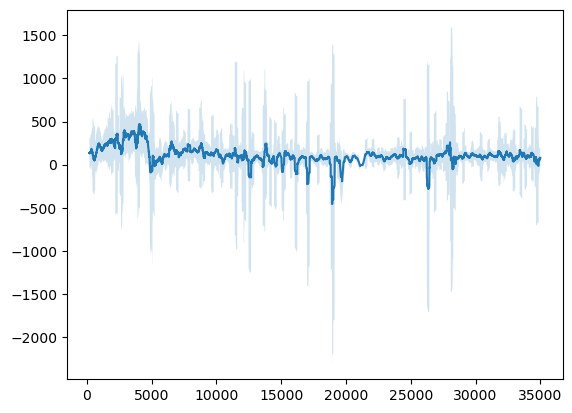

In [6]:
rolling_window = df['PROGNOSE-EXT_Preise_EURspez_AE00-ENTSOE-Indikative'].rolling(window=200)
rolling_mean = rolling_window.mean()
rolling_std = rolling_window.std()
rolling_min = rolling_window.min()
rolling_max = rolling_window.max()
ax = rolling_mean.plot()
ax.fill_between(df.index, rolling_mean-rolling_std, rolling_mean+rolling_std, alpha=0.2)

In [ ]:
#df.plot(x="BALANCING_TIME_UNIT_UTC", y="PROGNOSE-EXT_Preise_EURspez_AE00-ENTSOE-Indikative", figsize=(20, 10), alpha=0.5)
plt.figure(figsize=(20, 10))
plt.plot(df["BALANCING_TIME_UNIT_UTC"], rolling_mean, label="original")
plt.fill_between(df["BALANCING_TIME_UNIT_UTC"], rolling_mean-rolling_std, rolling_mean+rolling_std, alpha=0.5, label="rolling std", color="orange")
plt.fill_between(df["BALANCING_TIME_UNIT_UTC"], rolling_min, rolling_max, alpha=0.2, label="rolling min/max", color="orange")
plt.yscale("symlog")
plt.legend()
plt.show()

In [ ]:
import plotly.graph_objects as go

# Create traces for the mean, std deviation areas, and min/max areas
trace1 = go.Scatter(
    x=df["BALANCING_TIME_UNIT_UTC"],
    y=rolling_mean,
    mode='lines',
    name='Rolling Mean'
)

trace2 = go.Scatter(
    x=df["BALANCING_TIME_UNIT_UTC"],
    y=rolling_mean + rolling_std,
    fill=None,
    mode='lines',
    name='Rolling Std Upper'
)

trace3 = go.Scatter(
    x=df["BALANCING_TIME_UNIT_UTC"],
    y=rolling_mean - rolling_std,
    fill='tonexty',  # this fills the area between trace2 and trace3
    mode='lines',
    name='Rolling Std Lower'
)

trace4 = go.Scatter(
    x=df["BALANCING_TIME_UNIT_UTC"],
    y=rolling_min,
    fill=None,
    mode='lines',
    name='Rolling Min'
)

trace5 = go.Scatter(
    x=df["BALANCING_TIME_UNIT_UTC"],
    y=rolling_max,
    fill='tonexty',  # this fills the area between trace4 and trace5
    mode='lines',
    name='Rolling Max'
)

# Define the layout of the plot
layout = go.Layout(
    title='Rolling Mean and Std Deviation',
    xaxis_title='Time',
    yaxis_title='Value',
    #yaxis_type='symlog',  # This sets the y-axis to a log scale
    showlegend=True,
    legend=dict(
        x=0,
        y=1.0
    ),
    margin=dict(l=40, r=0, t=40, b=30),
    xaxis=dict(rangeslider=dict(visible=True), type='date')
)

# Combine traces and layout into a figure
fig = go.Figure(data=[trace1, trace2, trace3, trace4, trace5], layout=layout)

# Show the figure
fig.show()


In [ ]:
import plotly.graph_objects as go

# Create traces for the mean, std deviation areas, and min/max areas
trace1 = go.Scatter(
    x=df["BALANCING_TIME_UNIT_UTC"],
    y=rolling_mean,
    mode='lines',
    name='Rolling Mean'
)

true_trace = go.Scatter(
    x=df["BALANCING_TIME_UNIT_UTC"],
    y=df["PROGNOSE-EXT_Preise_EURspez_AE00-ENTSOE-Indikative"],
    mode='lines',
    name='True Value'
)

trace2 = go.Scatter(
    x=df["BALANCING_TIME_UNIT_UTC"],
    y=rolling_mean + rolling_std,
    fill=None,
    mode='lines',
    name='Rolling Std Upper'
)

trace3 = go.Scatter(
    x=df["BALANCING_TIME_UNIT_UTC"],
    y=rolling_mean - rolling_std,
    fill='tonexty',  # this fills the area between trace2 and trace3
    mode='lines',
    name='Rolling Std Lower'
)

trace4 = go.Scatter(
    x=df["BALANCING_TIME_UNIT_UTC"],
    y=rolling_min,
    fill=None,
    mode='lines',
    name='Rolling Min'
)

trace5 = go.Scatter(
    x=df["BALANCING_TIME_UNIT_UTC"],
    y=rolling_max,
    fill='tonexty',  # this fills the area between trace4 and trace5
    mode='lines',
    name='Rolling Max'
)

# Define the layout of the plot
layout = go.Layout(
    title='Rolling Mean and Std Deviation',
    xaxis_title='Time',
    yaxis_title='Value',
    yaxis_type='linear',  # This sets the y-axis to a log scale
    showlegend=True,
    legend=dict(
        x=0,
        y=1.0
    ),
    margin=dict(l=40, r=0, t=40, b=30),
    xaxis=dict(rangeslider=dict(visible=True), type='date')
)

# Combine traces and layout into a figure
fig = go.Figure(data=[trace1, trace2, trace3, trace4, trace5, true_trace], layout=layout)

# Show the figure
fig.show()


In [ ]:
features = df.iloc[:, 2:].to_numpy()

In [ ]:
targets = df.iloc[:, 1].to_numpy()

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from umap import UMAP

normalized_features = StandardScaler().fit_transform(features)

pca_features = PCA(n_components=2).fit_transform(normalized_features)
tsne_features = TSNE(n_components=2).fit_transform(normalized_features)
umap_features = UMAP(n_components=2).fit_transform(normalized_features)

In [ ]:
plt.figure(figsize=(20, 10))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=np.abs(targets)>300)
plt.title("PCA")
plt.show()

plt.figure(figsize=(20, 10))
plt.scatter(tsne_features[:, 0], tsne_features[:, 1], c=np.abs(targets)>300)
plt.title("TSNE")
plt.show()

plt.figure(figsize=(20, 10))
plt.scatter(umap_features[:, 0], umap_features[:, 1], c=np.abs(targets)>300)
plt.title("UMAP")
plt.show()

# Train Model

In [2]:
from main import train_single_model_from_config
import yaml

{'a/b/c': 1, 'a/b/d': 2, 'a/e': 3, 'f': 4}


2024-03-28 14:38:47.303652: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-28 14:38:47.303720: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-28 14:38:47.438527: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-28 14:38:47.709616: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-28 14:38:49.905359: W tensorflow/compiler/tf2

In [3]:
config_file = "configs/notebook_configs/config_mdn_voest_semifinal.yml"

In [4]:
with open(config_file, "r") as f:
    config = yaml.safe_load(f)

In [5]:
model = train_single_model_from_config(config_file)

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
val_nll_loss: 5.0424419082758085, train-loss: -0.8682743310928345:   5%|▍         | 24/500 [04:11<1:07:02,  8.45s/it]

Epoch 00024: reducing learning rate of group 0 to 1.0000e-04.


val_nll_loss: 5.045560335930977, train-loss: -0.784190833568573:   5%|▌         | 27/500 [04:43<1:22:48, 10.50s/it]  

Early stopping


In [6]:
from tqdm import tqdm

In [7]:
from utils.data_module import VoestDataModule
from utils.evaluation_functions import ConformalPrediction, infer_quantalized_conformal_p, log_permutation_feature_importance
cp = ConformalPrediction()
import torch
dm = VoestDataModule(**config["data_hyperparameters"])
device = "cuda" if torch.cuda.is_available() else "cpu"

In [8]:
require_target_preds = "use_last_target_as_feature" in config["data_hyperparameters"] and config["data_hyperparameters"]["use_last_target_as_feature"]
if require_target_preds:
    config_file = "configs/notebook_configs/config_mdn_voest_realistic.yml"
    with open(config_file, "r") as f:
        config_no_target_preds = yaml.safe_load(f)
    config_no_target_preds["data_hyperparameters"]["use_last_target_as_feature"] = False

In [9]:
if require_target_preds: #train a model that does not require target predictions -> then inject target predictions into the other model


    model_no_targets = train_single_model_from_config(config_no_target_preds)
    

In [10]:
if require_target_preds:
    dm_no_targets = VoestDataModule(**config_no_target_preds["data_hyperparameters"])

    model_no_targets.eval()

    dl = dm_no_targets.get_total_dataloader(64)
    target_preds = []
    for batch in tqdm(dl):
        x, y = batch
        x = x.to(device)
        y = y.to(device)

        pred = model_no_targets.get_statistics(x)["modes"]
        target_preds.extend([pre.item() for pre in pred])
    target_preds = np.array(target_preds)

In [11]:
def get_y_histograms(model, dm, y_space = None, conformal_p = 0.9):
    model.eval()

    
    tdl = dm.get_total_dataloader(64)
    if y_space is None:
        y_space = dm.test_dataset.y_space
    y_space = torch.tensor(y_space).to(device).reshape(-1, 1)
    n_bins = len(y_space)

    density_list = []

    for batch in tqdm(tdl):
        if len(batch) == 2:
            x, y = batch
        else:
            x, y, _ = batch
            

        x = x.to(device)
        #x = x.expand(n_bins, -1)

        precomp_variables = model(x)
    
        #densities = model.get_density(x, y_space)

        grid = cp(y_space, x, y, model, precomp_variables, return_grid_instead=True, conformal_p=conformal_p, conformal_finer=1)
        density_list.extend([grid_item.cpu().detach().numpy() for grid_item in grid])
        #density_list.append(densities.cpu().detach().numpy())
    
    return density_list

In [12]:
if require_target_preds:
    dm_eval = VoestDataModule(**config["data_hyperparameters"], inject_targets_as_features = target_preds)
else:
    dm_eval = dm

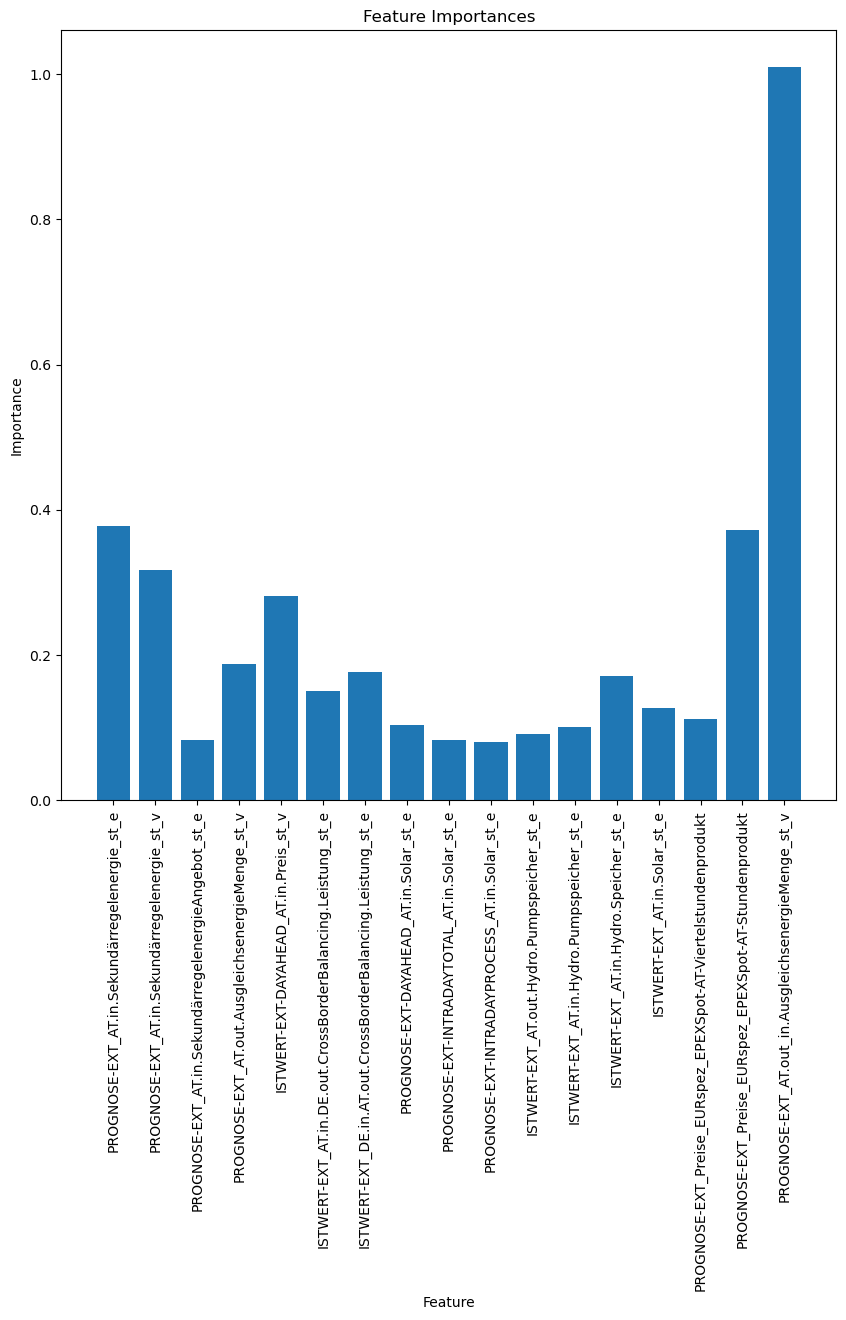

PROGNOSE-EXT-INTRADAYPROCESS_AT.in.Solar_st_e: 0.08009728789329529
PROGNOSE-EXT-INTRADAYTOTAL_AT.in.Solar_st_e: 0.0821688249707222
PROGNOSE-EXT_AT.in.SekundärregelenergieAngebot_st_e: 0.08242074400186539
ISTWERT-EXT_AT.out.Hydro.Pumpspeicher_st_e: 0.09073935449123383
ISTWERT-EXT_AT.in.Hydro.Pumpspeicher_st_e: 0.10027860850095749
PROGNOSE-EXT-DAYAHEAD_AT.in.Solar_st_e: 0.10325198620557785
PROGNOSE-EXT_Preise_EURspez_EPEXSpot-AT-Viertelstundenprodukt: 0.11222045868635178
ISTWERT-EXT_AT.in.Solar_st_e: 0.12679611146450043
ISTWERT-EXT_AT.in.DE.out.CrossBorderBalancing.Leistung_st_e: 0.15056245028972626
ISTWERT-EXT_AT.in.Hydro.Speicher_st_e: 0.1713455766439438
ISTWERT-EXT_DE.in.AT.out.CrossBorderBalancing.Leistung_st_e: 0.17687292397022247
PROGNOSE-EXT_AT.out.AusgleichsenergieMenge_st_v: 0.18722115457057953
ISTWERT-EXT-DAYAHEAD_AT.in.Preis_st_v: 0.28107425570487976
PROGNOSE-EXT_AT.in.Sekundärregelenergie_st_v: 0.3163771629333496
PROGNOSE-EXT_Preise_EURspez_EPEXSpot-AT-Stundenprodukt: 0.37235

In [13]:
%matplotlib inline
log_permutation_feature_importance(None, model, dm_eval.get_test_dataloader(64), device, show_plot_instead=True,
                                   feature_names=[str(a) for a in dm_eval.voest_ds.columns[2:]])

In [14]:
from utils.models.basic_architectures import ConditionalDensityEstimator
def get_uncertainty(model: ConditionalDensityEstimator, dm):
    tdl = dm.get_total_dataloader(64)

    uncertainty_list = []
    for batch in tqdm(tdl):
        if len(batch) == 2:
            x, y = batch
        else:
            x, y, _ = batch

        x = x.to(device)
        y = y.to(device)

        uncertainty = model.monte_carlo_dropout_distributional_uncertainty(x, y, n_samples =10)
        uncertainty_list.extend([unc.cpu().detach().numpy() for unc in uncertainty])
    return uncertainty_list

In [15]:
def get_nlls(model, dm):
    tdl = dm.get_total_dataloader(64)

    nll_list = []
    for batch in tqdm(tdl):
        if len(batch) == 2:
            x, y = batch
        else:
            x, y, _ = batch

        x = x.to(device)
        y = y.to(device)

        nll = model.get_nll(x, y, normalised_output_domain=False)
        nll_list.extend([nll_item.cpu().detach().numpy() for nll_item in nll])
    return nll_list

In [16]:
y_space = dm.test_dataset.y_space
vert_pos = torch.linspace(y_space.min()+1000, y_space.max()-1000, 256).numpy()

In [17]:
p_we_want= infer_quantalized_conformal_p(
    model, dm_eval.get_val_dataloader(64), device, y_space, False, 0.97, conformal_finer=1
)

NOTE: it seems that when the distribution in time series is far away then the conformal p we need will be disproportionally large compared to what we would expect.

In [18]:
p_we_want

0.9625389379262924

In [ ]:
histograms = get_y_histograms(model, dm_eval, y_space=vert_pos, conformal_p=p_we_want)

In [44]:
def get_y_densities(model, dm, y_space = None):
    model.eval()

    
    tdl = dm.get_total_dataloader(64)
    #if y_space is None:
    #    y_space = dm.test_dataset.y_space
    y_space = torch.tensor(y_space).to(device)#.reshape(-1, 1)
    n_bins = len(y_space)

    density_list = []

    for batch in tqdm(tdl):
        if len(batch) == 2:
            x, y = batch
        else:
            x, y, _ = batch
            

        x = x.to(device)
        #x = x.expand(n_bins, -1)

        precomp_variables = model(x)
    
        #densities = model.get_density(x, y_space)
        grid = model.get_density_grid(x, y_space)
        #grid = cp(y_space, x, y, model, precomp_variables, return_grid_instead=True, conformal_p=conformal_p, conformal_finer=1)
        density_list.extend([grid_item.cpu().detach().numpy() for grid_item in grid])
        #density_list.append(densities.cpu().detach().numpy())
    
    return density_list

In [45]:
model.y_space.shape

torch.Size([256])

In [46]:
vert_pos = torch.linspace(y_space.min()-2000, y_space.max()+5000, 256)
vert_pos.shape

torch.Size([256])

In [47]:
histograms = get_y_densities(model, dm_eval, y_space=vert_pos)

/tmp/ipykernel_8653/1730735028.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_space = torch.tensor(y_space).to(device)#.reshape(-1, 1)
100%|██████████| 546/546 [00:40<00:00, 13.63it/s]


In [48]:
import matplotlib.pyplot as plt

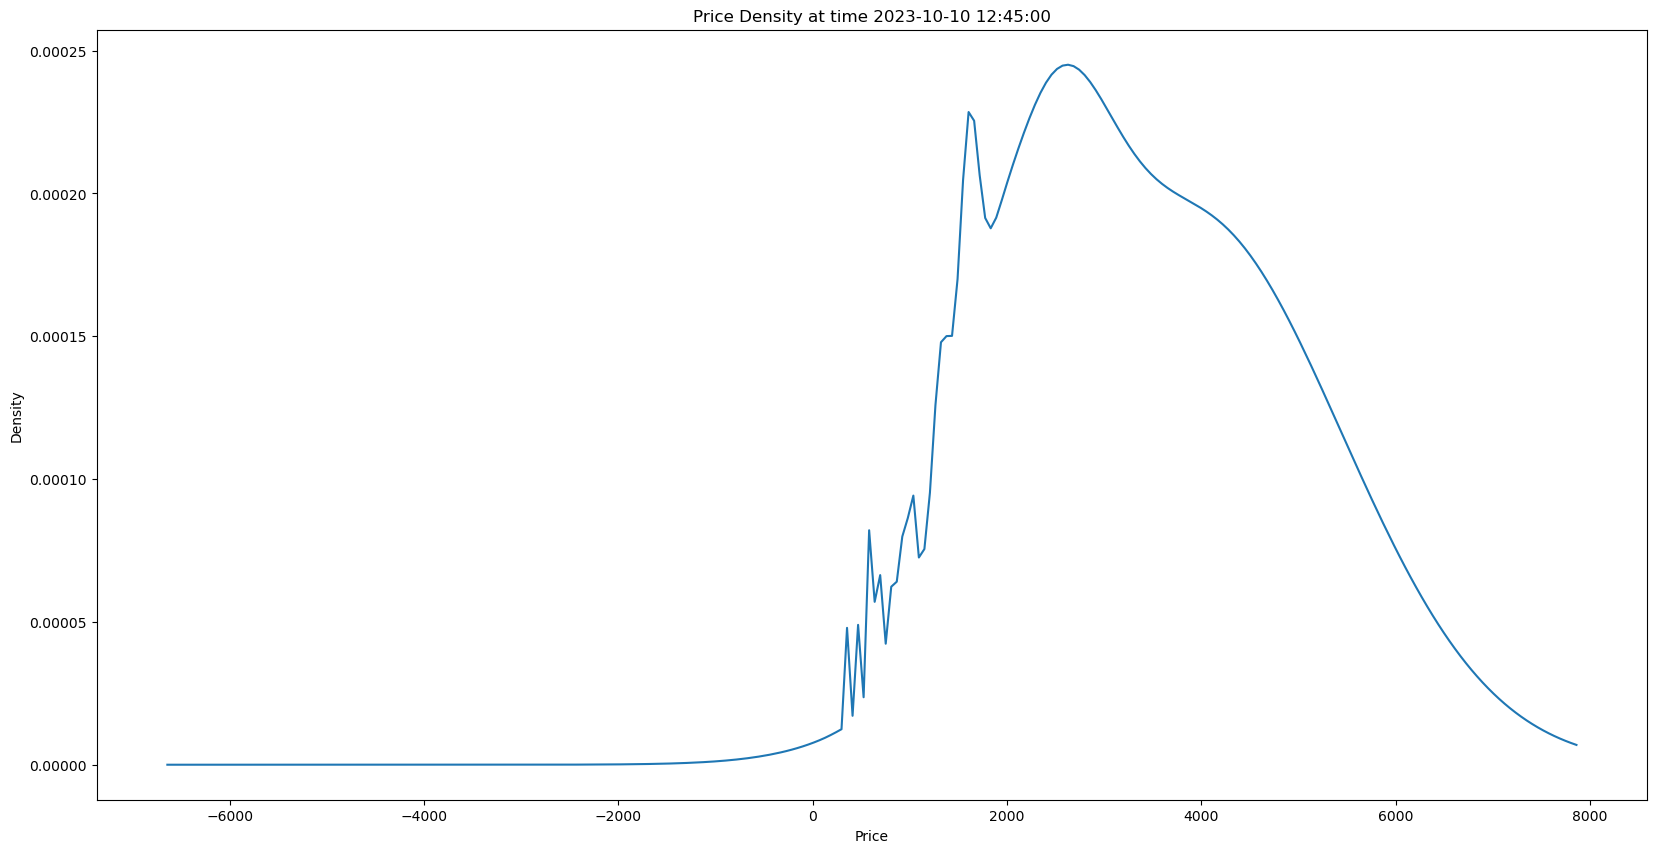

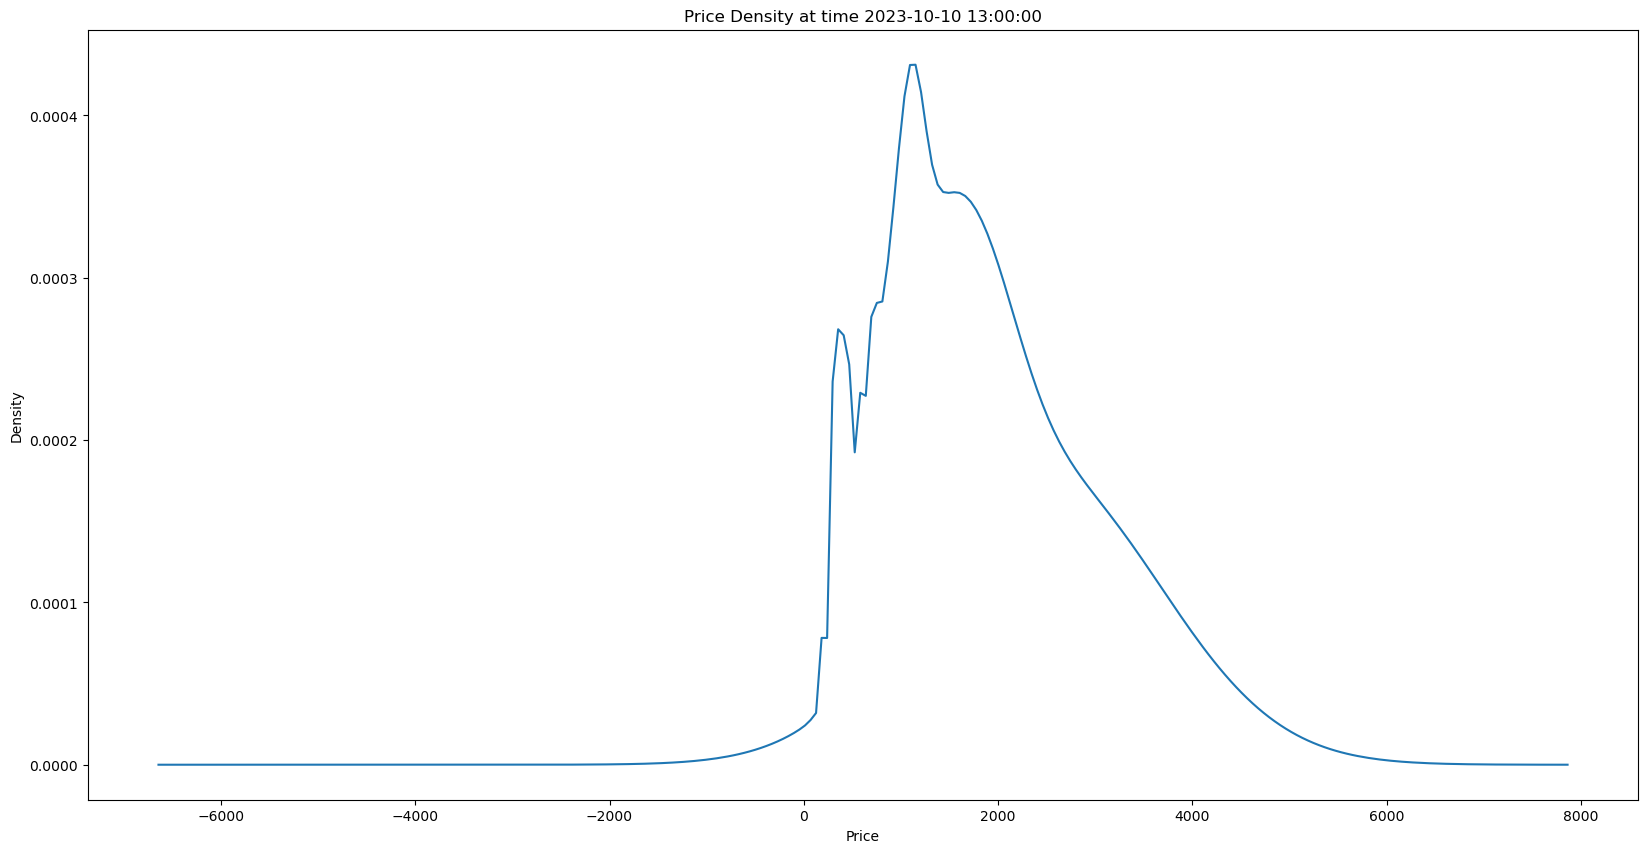

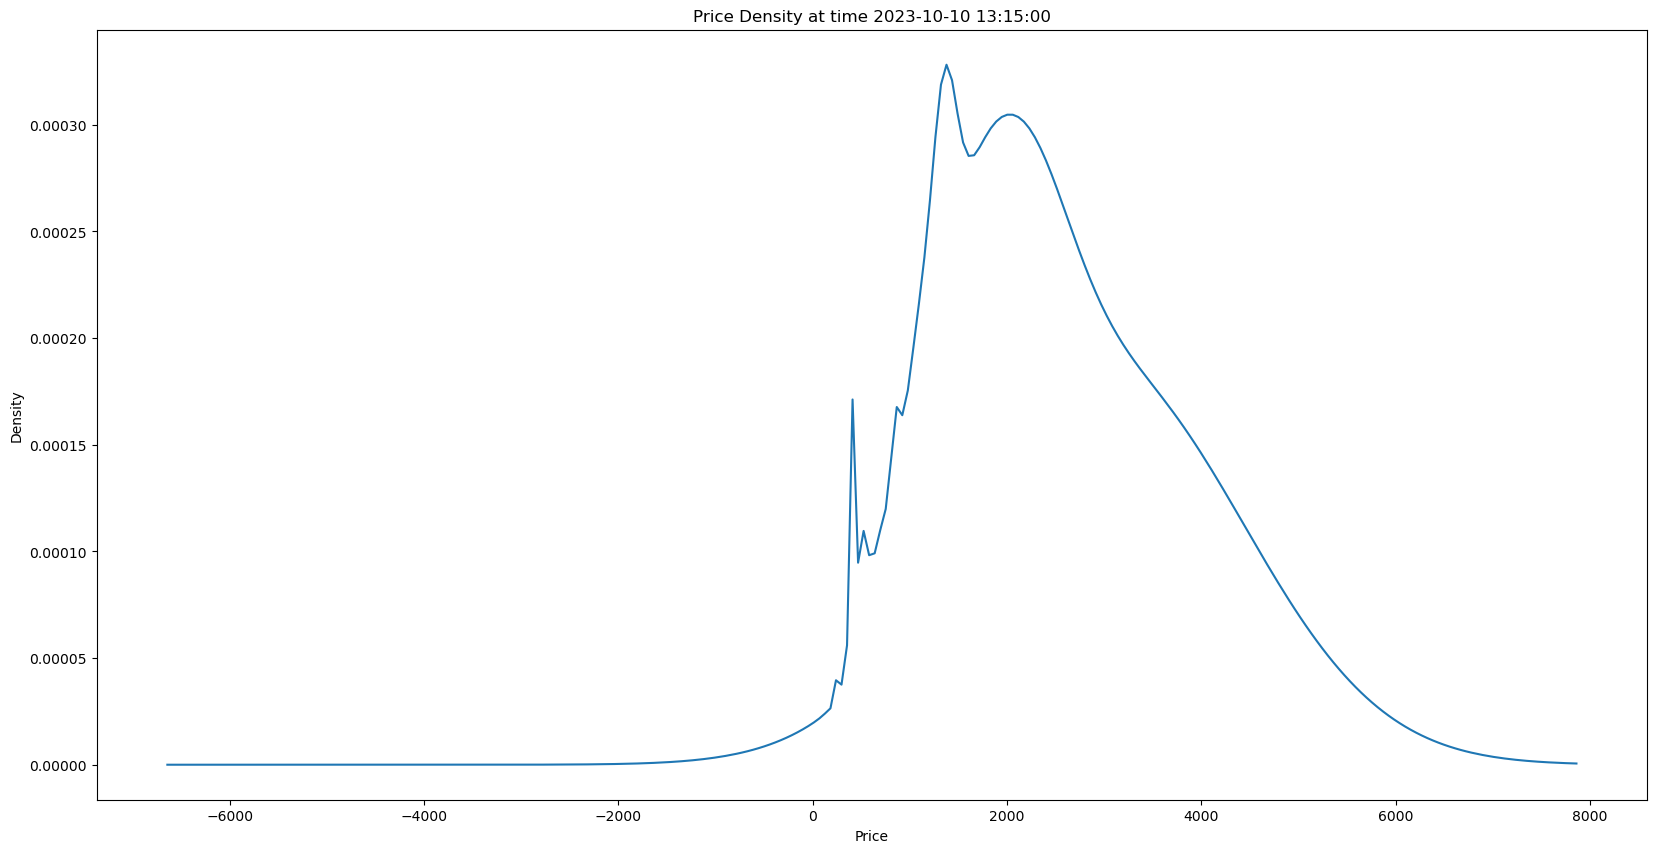

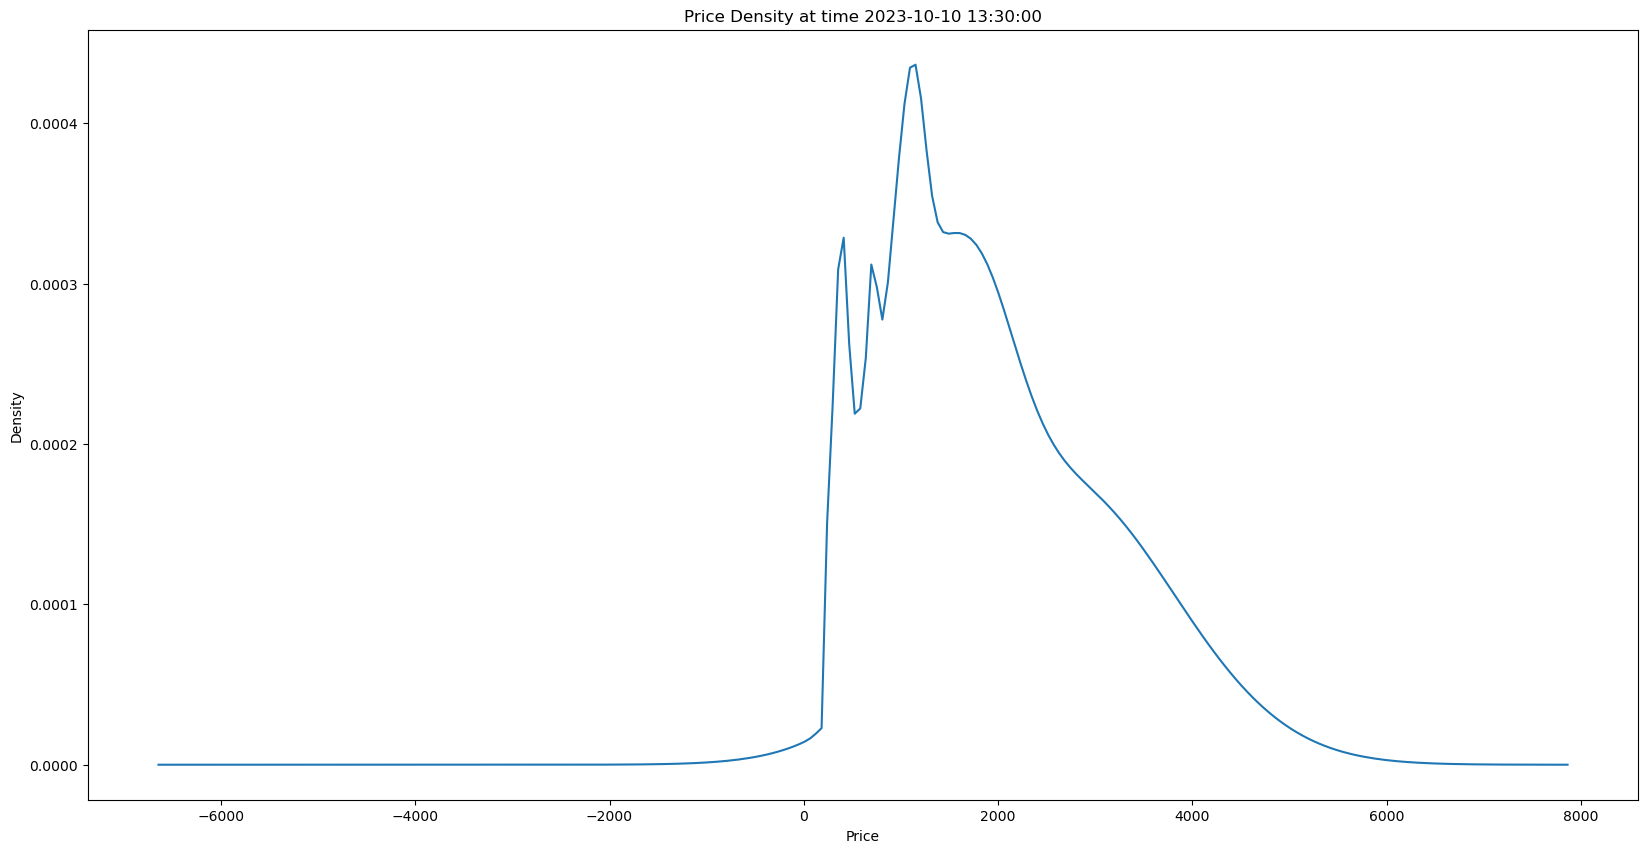

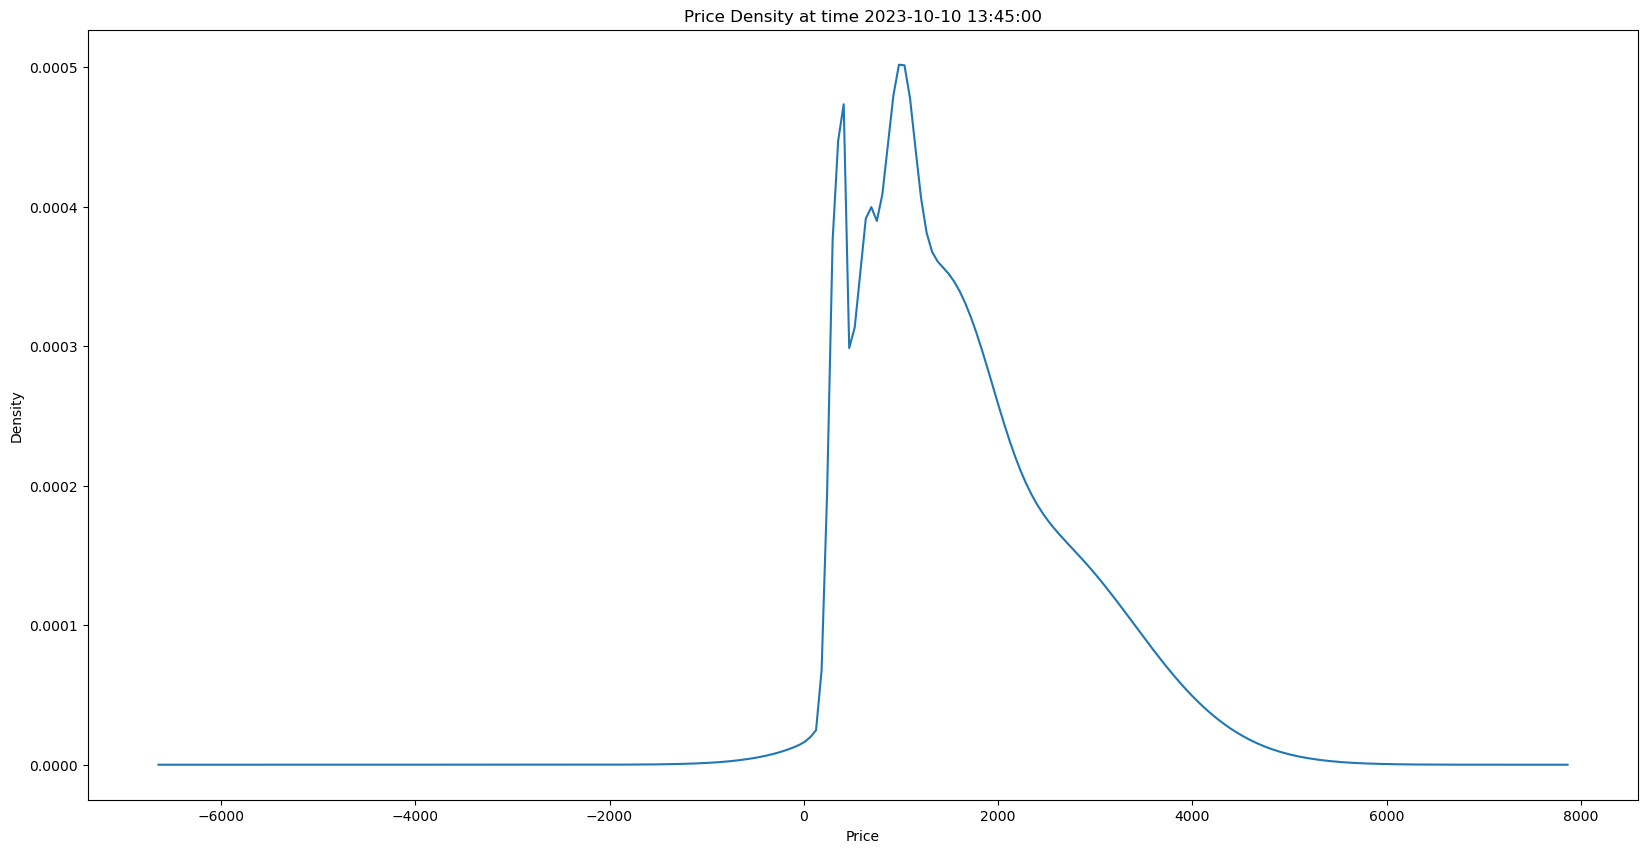

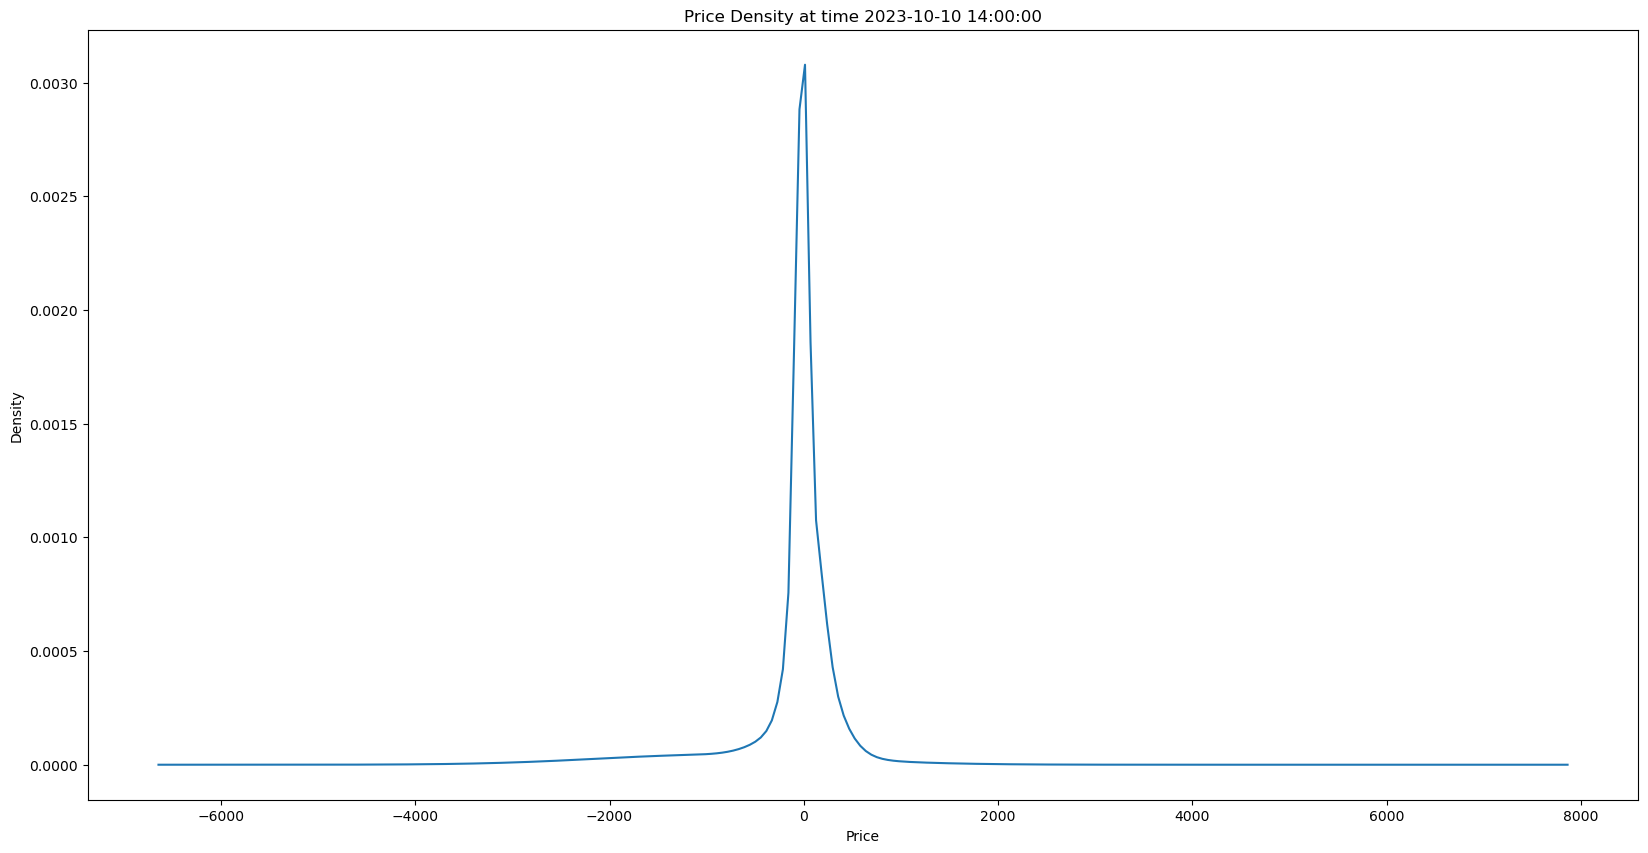

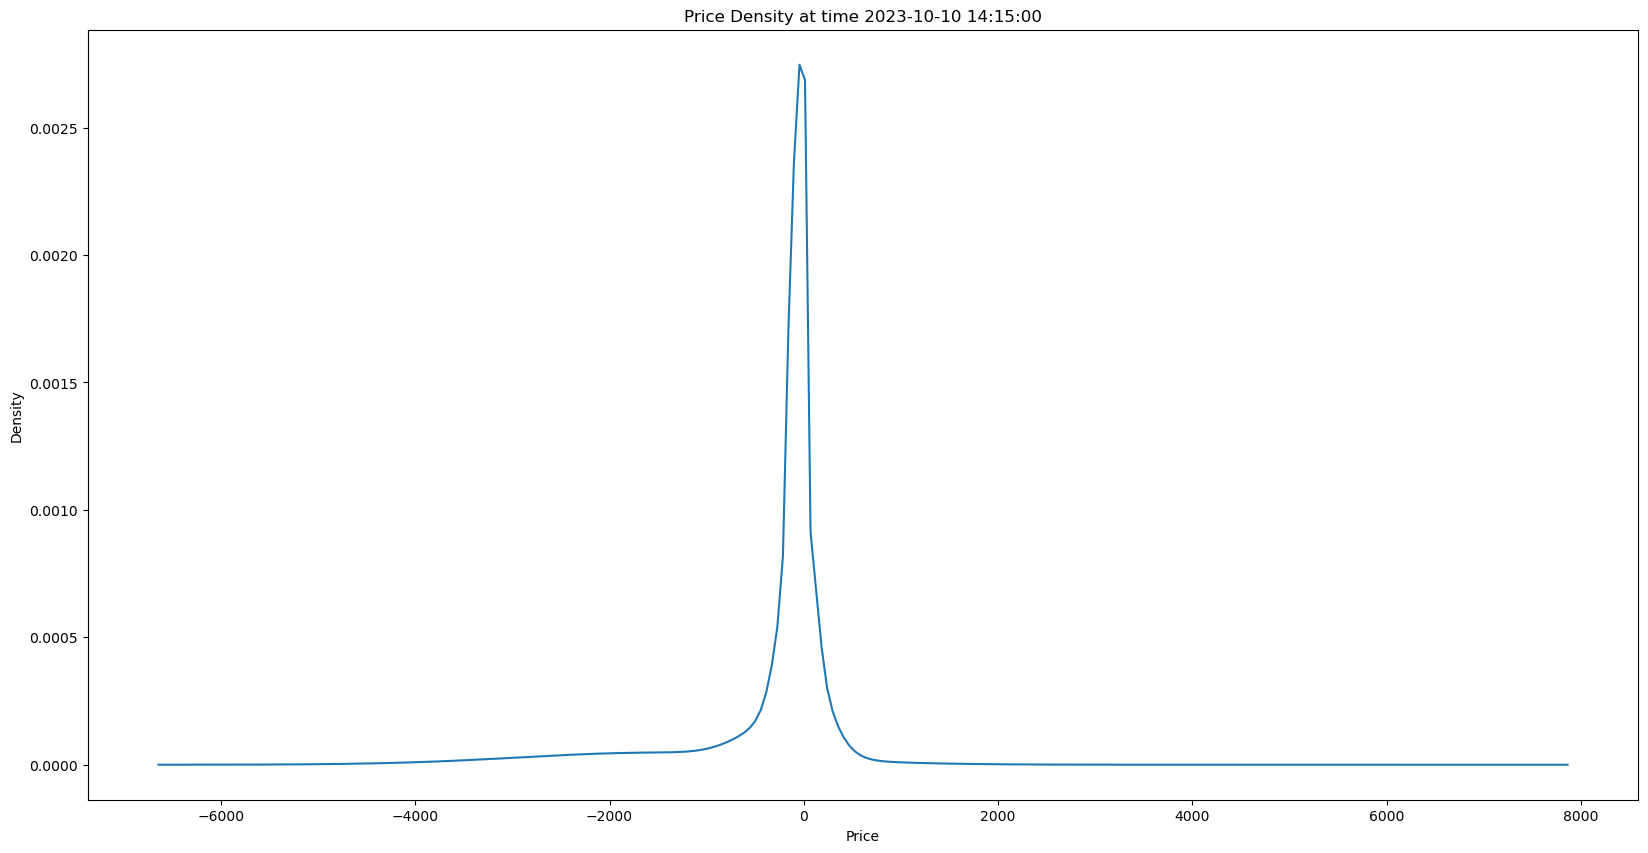

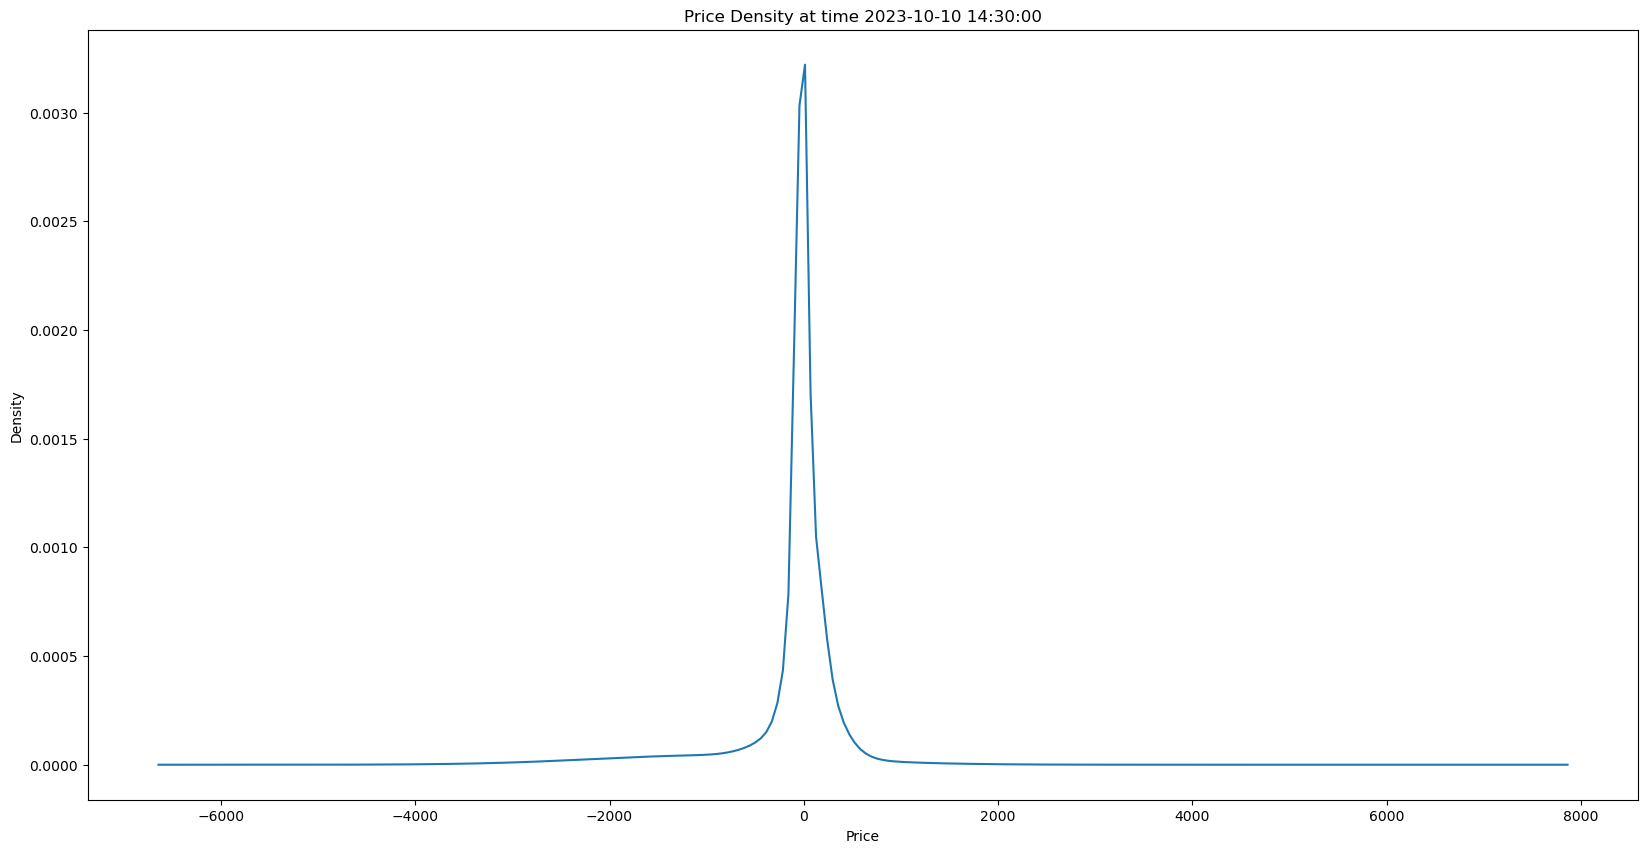

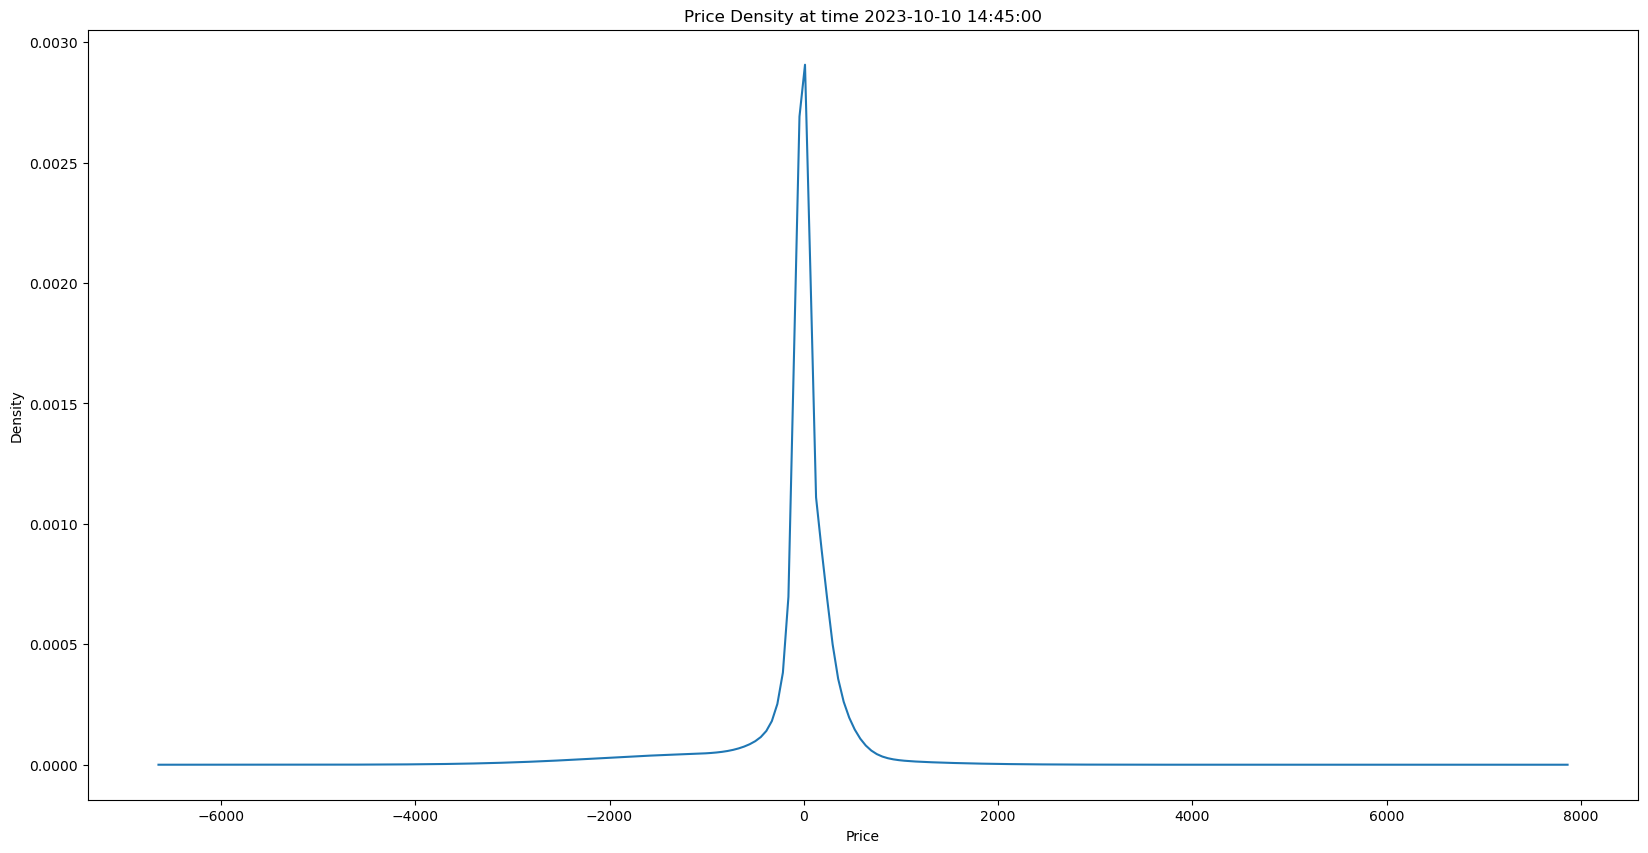

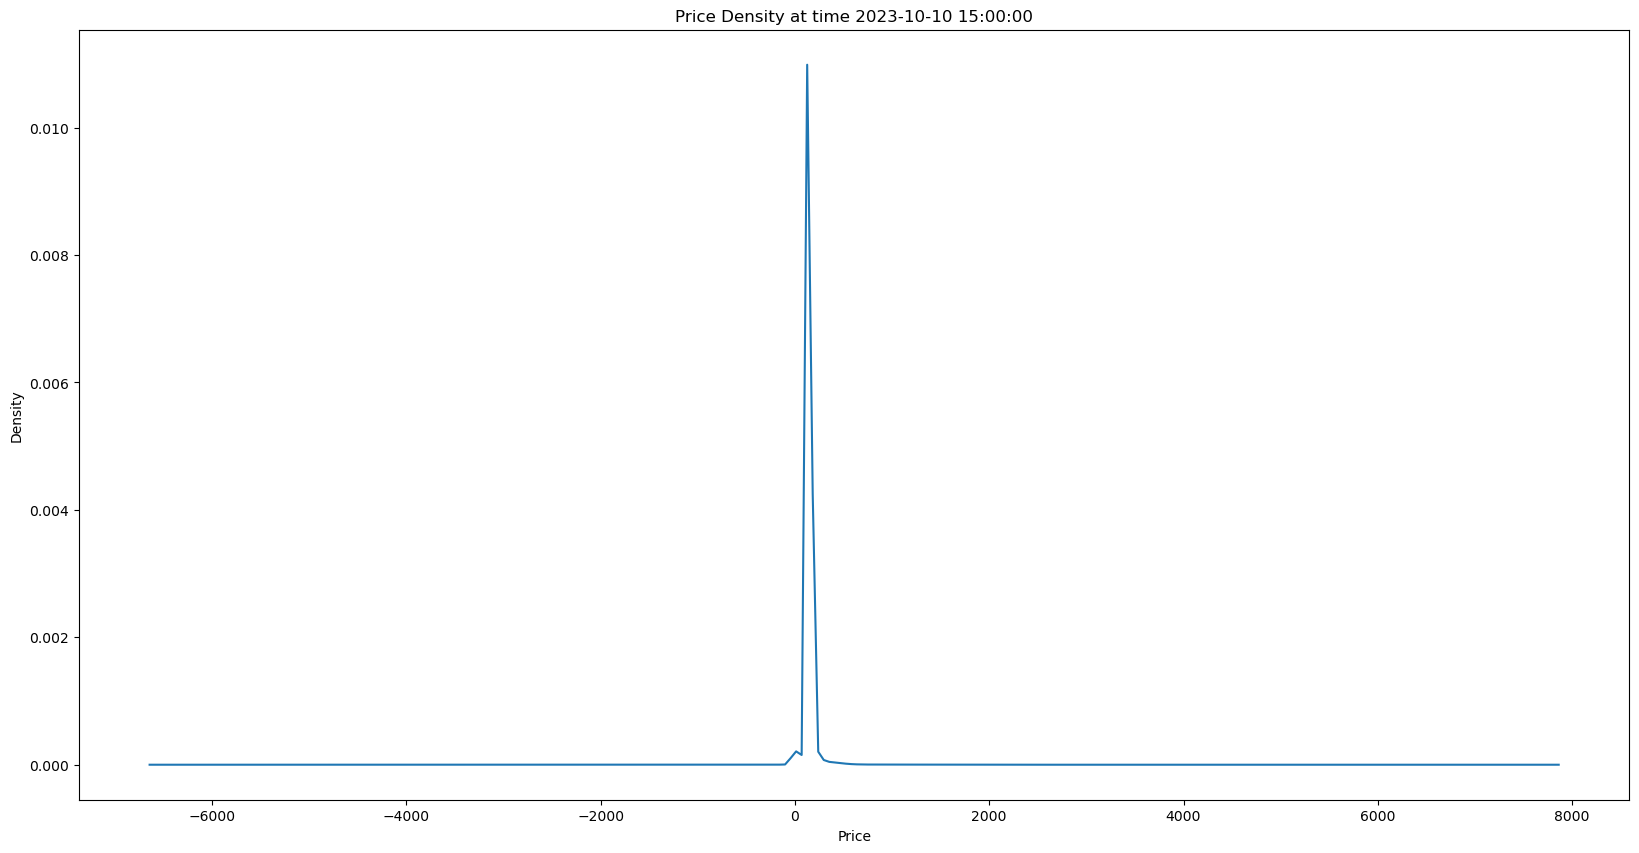

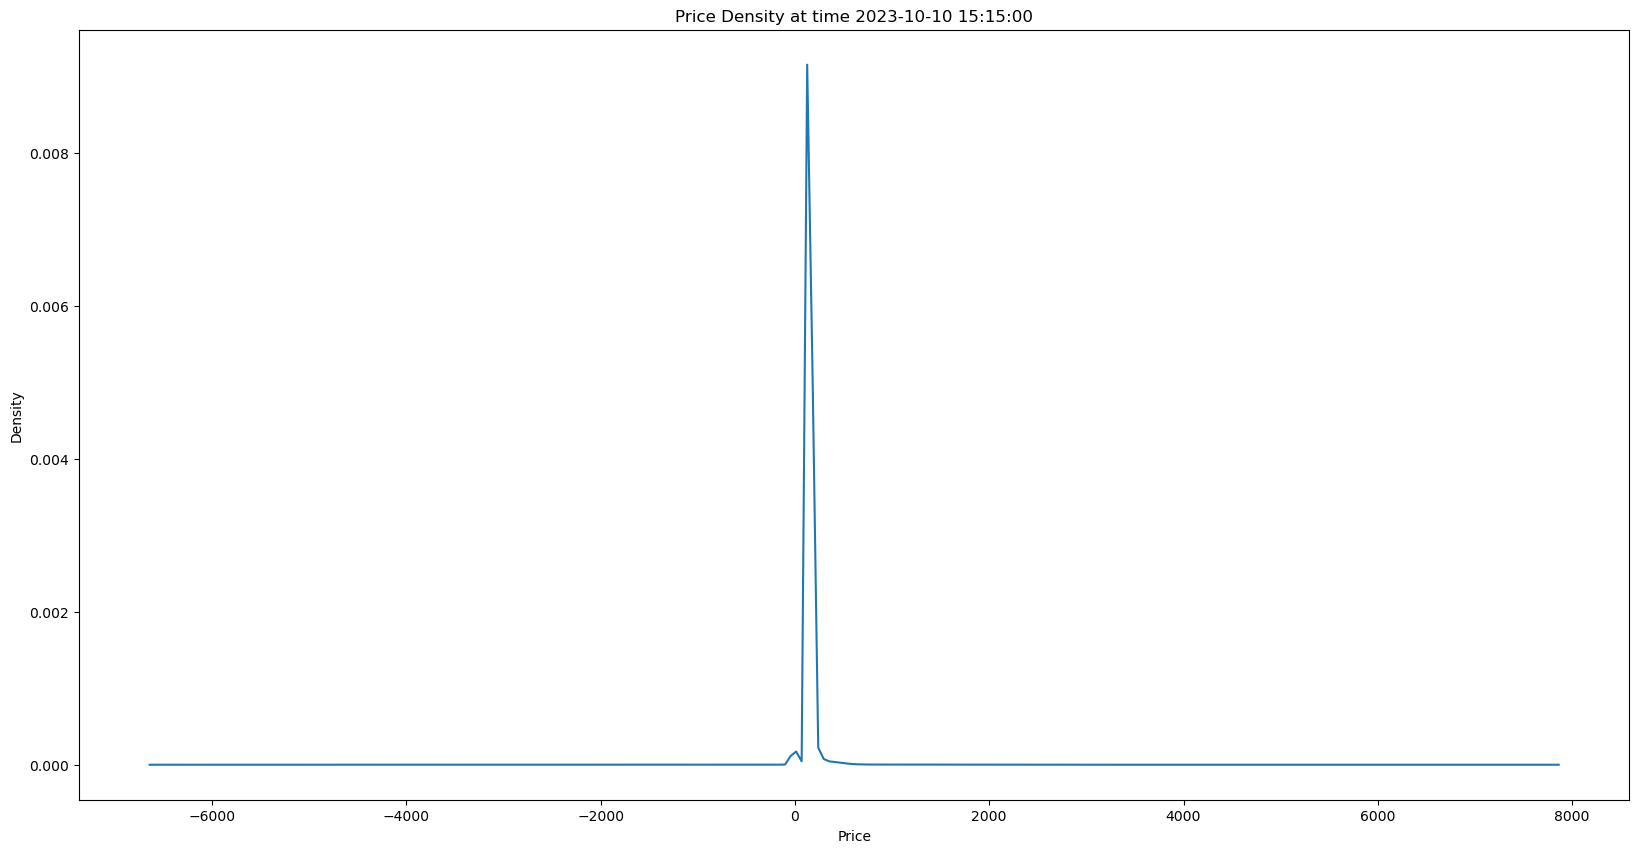

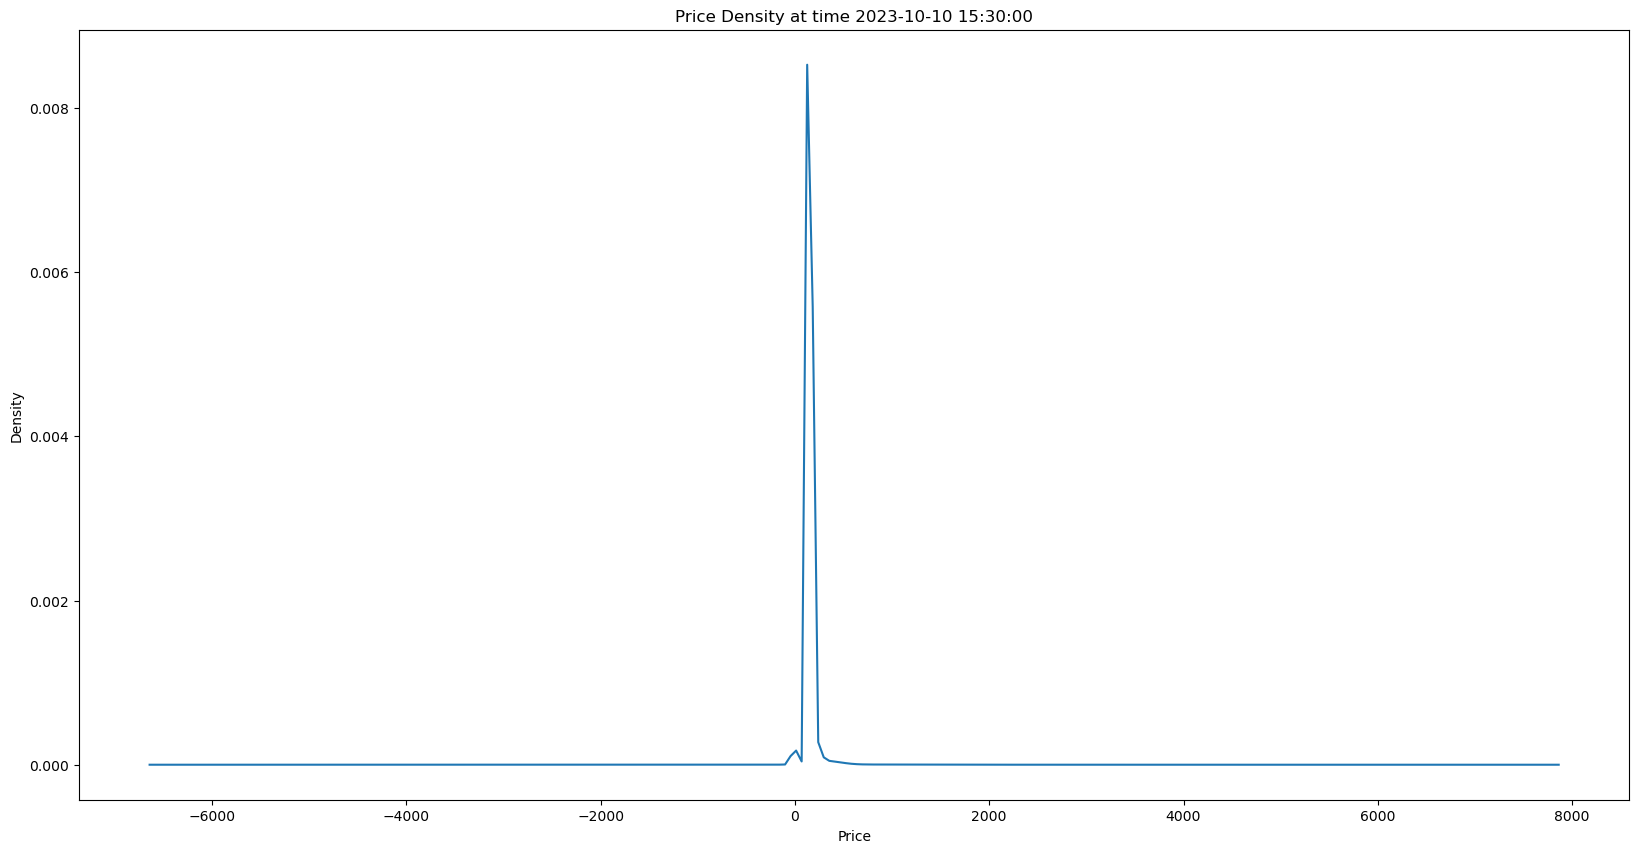

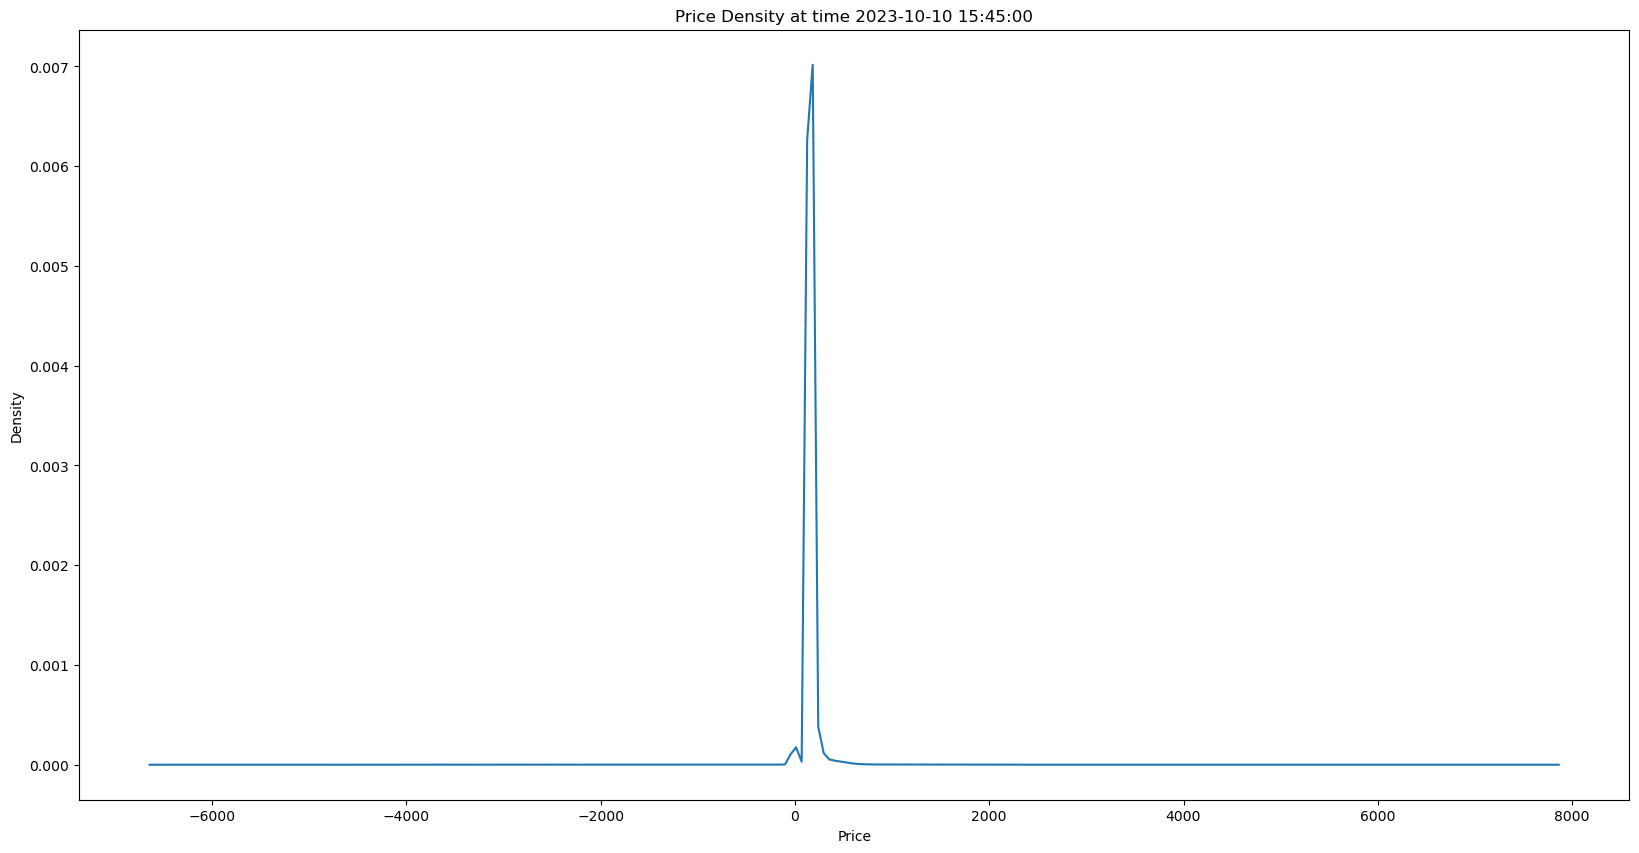

In [50]:
for i in range(32307,32320):
    plt.figure(figsize=(20, 10))
    plt.plot(vert_pos, histograms[i])
    plt.xlabel("Price")
    plt.ylabel("Density")
    plt.title(f"Price Density at time {dm.voest_ds.iloc[i]['BALANCING_TIME_UNIT_UTC']}")
    #plt.xlim(-1200, 5000)
    plt.show()

In [ ]:
import numpy as np

In [ ]:
uncertainties = np.array(get_uncertainty(model, dm_eval))

In [ ]:
nlls = np.array(get_nlls(model, dm_eval))
print(np.mean(nlls))

In [ ]:
inverse_unc = 1/uncertainties
inverse_normalized_unc = inverse_unc / np.sum(inverse_unc)

In [ ]:
print(np.sum(nlls * inverse_normalized_unc))

In [ ]:
np.corrcoef(nlls, uncertainties)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.figure(figsize=(20, 5))

window_size = 50

# Create the moving average filter
filter_ = np.ones(window_size) / window_size

# Apply the filter to the data
smoothed_uncertainties = np.convolve(uncertainties, filter_, mode='same')

plt.plot(uncertainties, alpha=0.5)
plt.plot(smoothed_uncertainties)
plt.grid()
plt.title("Uncertainties")
plt.show()

plt.figure(figsize=(20, 5))

filter_ = np.ones(window_size) / window_size

# Apply the filter to the data
smoothed_nlls = np.convolve(nlls, filter_, mode='same')

plt.plot(nlls, alpha=0.5)
plt.plot(smoothed_nlls)
plt.grid()
plt.title("NLLs")
plt.show()

In [ ]:
from utils.train import evaluate_model
config["training_hyperparameters"]["slow_first_n_batches"] = -1
eval_dict = evaluate_model(model, dm_eval.get_val_dataloader(64), device, y_space=y_space, **config["training_hyperparameters"])
print(eval_dict)

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
histograms = np.array(histograms, dtype=np.float32)

In [ ]:
df = dm.voest_ds

In [ ]:
max(dm.test_indices)

In [ ]:
test_ds = dm.voest_ds.iloc[dm.test_indices]
test_ds["BALANCING_TIME_UNIT_UTC"] = pd.to_datetime(test_ds["BALANCING_TIME_UNIT_UTC"])

train_ds = dm.voest_ds.iloc[dm.train_indices]
train_ds["BALANCING_TIME_UNIT_UTC"] = pd.to_datetime(train_ds["BALANCING_TIME_UNIT_UTC"])

val_ds = dm.voest_ds.iloc[dm.val_indices]
val_ds["BALANCING_TIME_UNIT_UTC"] = pd.to_datetime(val_ds["BALANCING_TIME_UNIT_UTC"])



In [ ]:
ds = dm.voest_ds
ds["BALANCING_TIME_UNIT_UTC"] = pd.to_datetime(ds["BALANCING_TIME_UNIT_UTC"])

In [ ]:
len(df), len(rolling_mean), histograms.shape

In [ ]:
import plotly.graph_objects as go

# Create traces for the mean, std deviation areas, and min/max areas
# trace1 = go.Scatter(
#     x=df["BALANCING_TIME_UNIT_UTC"],
#     y=rolling_mean,
#     mode='lines',
#     name='Rolling Mean'
# )


true_trace = go.Scatter(
    x=df["BALANCING_TIME_UNIT_UTC"],
    y=df["PROGNOSE-EXT_Preise_EURspez_AE00-ENTSOE-Indikative"],
    mode="markers",
    name='True Value',
    marker=dict(
        size=3  # Adjust the size of the points here
    )
)

# trace2 = go.Scatter(
#     x=df["BALANCING_TIME_UNIT_UTC"],
#     y=rolling_mean + rolling_std,
#     fill=None,
#     mode='lines',
#     name='Rolling Std Upper'
# )

# trace3 = go.Scatter(
#     x=df["BALANCING_TIME_UNIT_UTC"],
#     y=rolling_mean - rolling_std,
#     fill='tonexty',  # this fills the area between trace2 and trace3
#     mode='lines',
#     name='Rolling Std Lower'
# )

# trace4 = go.Scatter(
#     x=df["BALANCING_TIME_UNIT_UTC"],
#     y=rolling_min,
#     fill=None,
#     mode='lines',
#     name='Rolling Min'
# )

# trace5 = go.Scatter(
#     x=df["BALANCING_TIME_UNIT_UTC"],
#     y=rolling_max,
#     fill='tonexty',  # this fills the area between trace4 and trace5
#     mode='lines',
#     name='Rolling Max'
# )

# Define the layout of the plot
layout = go.Layout(
    title='Rolling Mean and Std Deviation',
    xaxis_title='Time',
    yaxis_title='Value',
    yaxis_type='linear',  # This sets the y-axis to a log scale
    showlegend=True,
    legend=dict(
        x=0,
        y=1.0
    ),
    margin=dict(l=40, r=0, t=40, b=30),
    xaxis=dict(rangeslider=dict(visible=True), type='date'),
     yaxis=dict(
        range=[-1500, 1500],  # replace with your desired limits
        # ... other yaxis settings ...
    ),
    shapes=[
        # Line Vertical
        dict(
            type="line",
            x0=test_ds.iloc[0]["BALANCING_TIME_UNIT_UTC"],
            y0=0,
            x1=test_ds.iloc[1]["BALANCING_TIME_UNIT_UTC"],
            y1=1,
            yref="paper",
            line=dict(
                color="rgb(255, 0, 0)",
                width=3
            )
        ),
        dict(
            type="line",
            x0=val_ds.iloc[0]["BALANCING_TIME_UNIT_UTC"],
            y0=0,
            x1=val_ds.iloc[1]["BALANCING_TIME_UNIT_UTC"],
            y1=1,
            yref="paper",
            line=dict(
                color="rgb(255, 0, 0)",
                width=3
            )
        ),
    ]
)
vert_thresh = 0.0001#0.02
heatmap_trace = go.Heatmap(
    x=ds["BALANCING_TIME_UNIT_UTC"],
    y=vert_pos,  # the vertical positions of the grid elements
    z=histograms.T,#(histograms_test.T>vert_thresh*0.0260)*100.0,  # the grid of values
    colorscale='Viridis',  # choose a colorscale
    name='Heatmap'
)

# Combine traces and layout into a figure
#fig = go.Figure(data=[trace1, trace2, trace3, trace4, trace5, true_trace, heatmap_trace], layout=layout)
fig = go.Figure(data=[true_trace, heatmap_trace], layout=layout)


# Show the figure
#fig.show()


In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import numpy as np

# Assuming 'uncertainties' is defined and 'filter_' is your moving average filter

# Create subplots with shared x-axis
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.1,
                    subplot_titles=('HDR Regions (yellow)', 'Main Plot'))

# Your uncertainty plot (adapted to Plotly)
window_size = 50
filter_ = np.ones(window_size) / window_size
smoothed_uncertainties = np.convolve(uncertainties, filter_, mode='same')

# Add the uncertainties plot to the first subplot
fig.add_trace(go.Scatter(x=df["BALANCING_TIME_UNIT_UTC"], y=uncertainties,
                         mode='lines', name='Original Uncertainties', line=dict(color='lightgrey')),
              row=2, col=1)
fig.add_trace(go.Scatter(x=df["BALANCING_TIME_UNIT_UTC"], y=smoothed_uncertainties,
                         mode='lines', name='Smoothed Uncertainties'),
              row=2, col=1)

# Add your original plot traces to the second subplot
# (Make sure to add each of your traces here, using row=2, col=1)
# E.g., fig.add_trace(trace1, row=2, col=1)
fig.add_trace(true_trace, row=1, col=1)
fig.add_trace(heatmap_trace, row=1, col=1)
# Add other traces...

# Update layout if needed, set the x-axis type to 'date' for both subplots if not already
#fig.update_layout(xaxis2=dict(type='date'), xaxis=dict(type='date'))
fig.update_layout(
    title='Highest Density Regions and Uncertainties',
    xaxis_title='Time',
    height=1000,
    yaxis_title='Value',
    yaxis_type='linear',  # This sets the y-axis to a log scale
    showlegend=True,
    legend=dict(
        x=0,
        y=1.0
    ),
    margin=dict(l=40, r=0, t=40, b=30),
    xaxis=dict(rangeslider=dict(visible=True), type='date'),
     yaxis=dict(
        range=[-1500, 1500],  # replace with your desired limits
    ),
    shapes=[
        # Line Vertical
        dict(
            type="line",
            x0=test_ds.iloc[0]["BALANCING_TIME_UNIT_UTC"],
            y0=0,
            x1=test_ds.iloc[1]["BALANCING_TIME_UNIT_UTC"],
            y1=1,
            yref="paper",
            line=dict(
                color="rgb(255, 0, 0)",
                width=3
            )
        ),
        dict(
            type="line",
            x0=val_ds.iloc[0]["BALANCING_TIME_UNIT_UTC"],
            y0=0,
            x1=val_ds.iloc[1]["BALANCING_TIME_UNIT_UTC"],
            y1=1,
            yref="paper",
            line=dict(
                color="rgb(255, 0, 0)",
                width=3
            )
        ),
    ]
)

# Show the figure
#fig.show()


In [ ]:
import plotly.io as pio
pio.write_html(fig, 'figure_voest_realistic.html')

In [ ]:
plt.stem(histograms[2])
plt.show()

In [ ]:
histograms[4]